![task](task_iris.JPG)
# Iris Species Classification

This notebook demonstrates the process of training machine learning models on the Iris dataset to classify iris species based on sepal and petal measurements.





![Flower](img.png)


## Exploratory Data Analysis (EDA)

Let's perform some basic EDA to understand our dataset.


In [1]:
import pandas as pd

# Load the dataset
file_path = 'Iris.csv'
iris_data = pd.read_csv(file_path)
iris_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")


In [3]:
# Check for missing values
iris_data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

## Preprocessing

We will encode the species names into numerical values and split the dataset into features and target labels.


In [4]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
iris_data['Species'] = le.fit_transform(iris_data['Species'])

# Split the dataset into features and target variable
X = iris_data.drop(['Id', 'Species'], axis=1)  # Features
y = iris_data['Species']                       # Target

In [5]:
from sklearn.model_selection import train_test_split

# Split the dataset into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Model Training

We will train multiple machine learning models to classify iris species.


In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Initialize the models
logreg = LogisticRegression(max_iter=200)
svm_model = SVC()
decision_tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier()
knn = KNeighborsClassifier()

# Dictionary to hold the models
models = {
    'Logistic Regression': logreg,
    'Support Vector Machine': svm_model,
    'Decision Tree': decision_tree,
    'Random Forest': random_forest,
    'K-Nearest Neighbors': knn
}

# Dictionary to hold the accuracies
accuracies = {}

# Train and evaluate each model
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    # Calculate the accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracies[model_name] = accuracy

accuracies

{'Logistic Regression': 1.0,
 'Support Vector Machine': 1.0,
 'Decision Tree': 1.0,
 'Random Forest': 1.0,
 'K-Nearest Neighbors': 1.0}

## Model Evaluation

After training, we will evaluate the accuracy of our models on the test set.


In [7]:
from sklearn.metrics import classification_report, confusion_matrix

# Evaluation metrics for each model
evaluation_metrics = {}

for model_name, model in models.items():
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Generate a classification report
    report = classification_report(y_test, y_pred, target_names=le.classes_)
    
    # Generate a confusion matrix
    confusion_mat = confusion_matrix(y_test, y_pred)
    
    # Store the report and confusion matrix
    evaluation_metrics[model_name] = {'Classification Report': report, 'Confusion Matrix': confusion_mat}

# Output the evaluation metrics for each model
for model_name, metrics in evaluation_metrics.items():
    print(f"Model: {model_name}")
    print("Classification Report:")
    print(metrics['Classification Report'])
    print("Confusion Matrix:")
    print(metrics['Confusion Matrix'])
    print("\n")  # Add a new line for better readability


Model: Logistic Regression
Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45

Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


Model: Support Vector Machine
Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45

Confusion Matrix:
[[19  0  0]
 [ 0 1

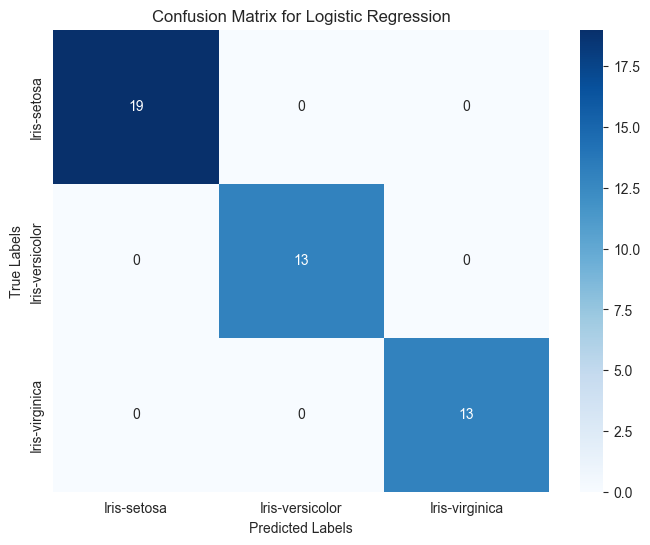

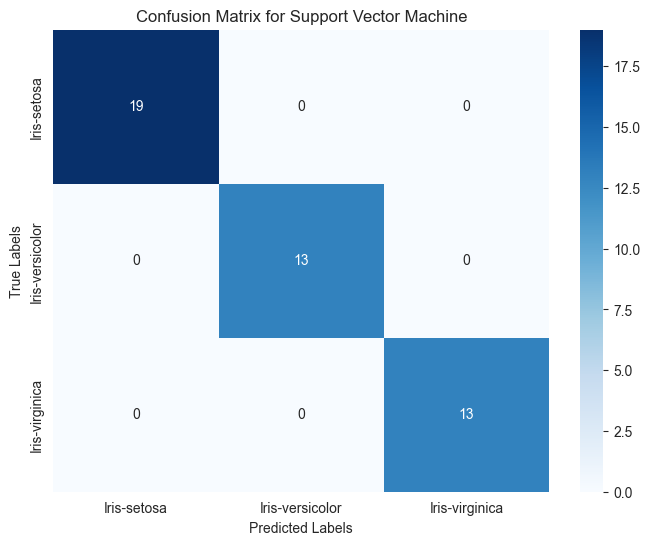

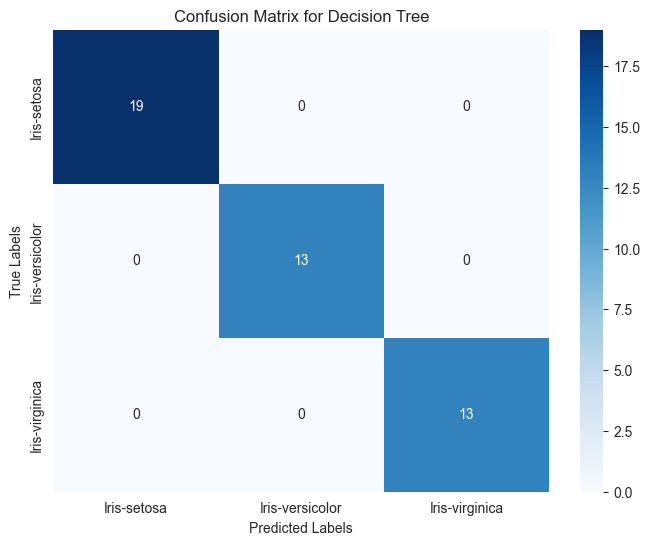

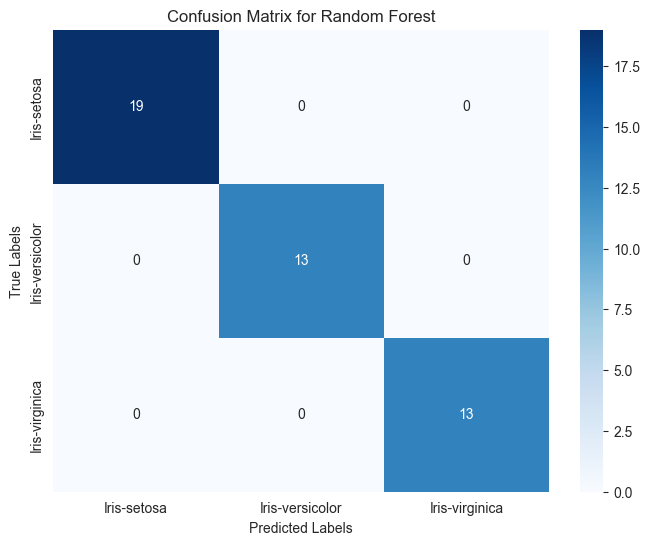

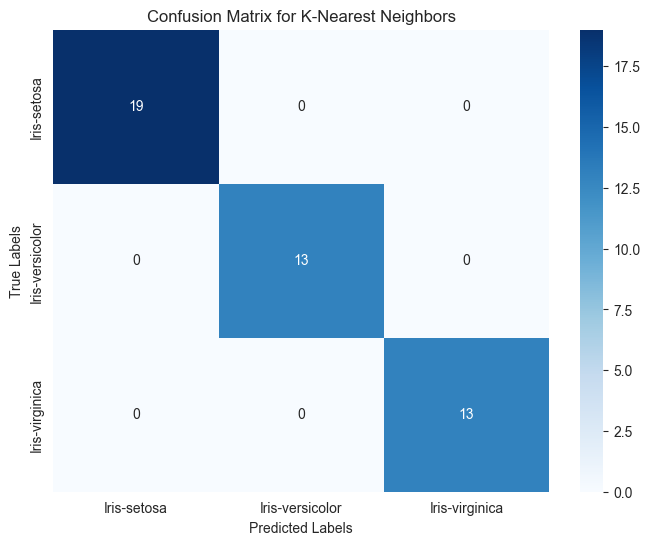

In [8]:
for model_name, model in models.items():
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Generate a confusion matrix
    confusion_mat = confusion_matrix(y_test, y_pred)
    
    # Plotting the confusion matrix using Seaborn's heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()
